## Callback API Task

In [1]:
from keras.datasets import mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

print("train dataset shape:", train_images.shape, train_targets.shape)
print("test dataset shape:", test_images.shape, test_targets.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


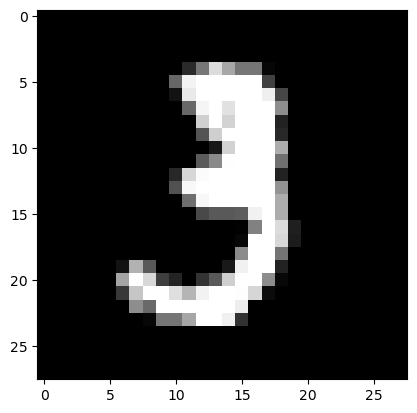

In [2]:
import matplotlib.pyplot as plt
pl
plt.imshow(train_images[10], cmap='gray')
plt.show()


In [3]:
from tensorflow.keras.layers import Layer, Input, Flatten, Dense
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs = input_tensor, outputs=output)
    return model

In [4]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype = np.float32)
    targets = np.array(targets, dtype = np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_vaild_test(train_images, train_targets, test_images, test_targets, validation_size = 0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets =\
    train_test_split(train_images, train_oh_targets, stratify= train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)


In [5]:
(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)=\
get_train_vaild_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)


(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = create_model()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

mcp_cb = ModelCheckpoint(
    filepath='./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5',
    monitor='var_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='auto'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)



history = model.fit(x=train_images, 
                    y=train_oh_targets,
                    validation_data= (validation_images, validation_oh_targets),
                    batch_size=64,
                    epochs=20,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8321 - loss: 0.5922 - val_acc: 0.9467 - val_loss: 0.1813 - learning_rate: 0.0010
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - acc: 0.9552 - loss: 0.1555 - val_acc: 0.9592 - val_loss: 0.1371 - learning_rate: 0.0010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - acc: 0.9685 - loss: 0.1059 - val_acc: 0.9604 - val_loss: 0.1302 - learning_rate: 0.0010
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - acc: 0.9749 - loss: 0.0847 - val_acc: 0.9686 - val_loss: 0.1031 - learning_rate: 0.0010
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - acc: 0.9802 - loss: 0.0634 - val_acc: 0.9689 - val_loss: 0.0998 - learning_rate: 0.0010
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - acc: 0.9841 - loss: 0.0510 - val_acc: 0.9739 - val_loss: 0.0874 - learning_rate: 0.0010
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - acc: 0.9864 - loss: 0.0452 - val_acc: 0.9717 - val_loss: 0.0917 - learning_rate: 0

In [7]:
!ls callback_files

weights.001-0.1803-0.9027.weights.h5  weights.008-0.0944-0.9869.weights.h5
weights.001-0.1813-0.9045.weights.h5  weights.008-0.1058-0.9872.weights.h5
weights.001-0.1855-0.9021.model.keras weights.009-0.0796-0.9943.model.keras
weights.002-0.1352-0.9573.model.keras weights.009-0.0809-0.9948.weights.h5
weights.002-0.1371-0.9558.weights.h5  weights.009-0.0817-0.9936.weights.h5
weights.002-0.1447-0.9559.weights.h5  weights.010-0.0791-0.9947.model.keras
weights.003-0.1153-0.9670.weights.h5  weights.010-0.0793-0.9965.weights.h5
weights.003-0.1188-0.9687.model.keras weights.010-0.0818-0.9955.weights.h5
weights.003-0.1302-0.9677.weights.h5  weights.011-0.0789-0.9971.weights.h5
weights.004-0.0995-0.9773.model.keras weights.011-0.0797-0.9954.model.keras
weights.004-0.1031-0.9747.weights.h5  weights.011-0.0818-0.9961.weights.h5
weights.004-0.1121-0.9749.weights.h5  weights.012-0.0795-0.9955.model.keras
weights.005-0.0998-0.9790.weights.h5  weights.012-0.0800-0.9974.weights.h5
weights.005-0.1059-0.

In [8]:
model.evaluate(test_images, test_oh_targets)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - acc: 0.9739 - loss: 0.0922


[0.07540556788444519, 0.9789000153541565]

In [9]:
model = create_model()
model.load_weights('./callback_files/weights.017-0.0808-0.9974.weights.h5')

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])
model.evaluate(test_images, test_oh_targets)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - acc: 0.9732 - loss: 0.0839


[0.07546978443861008, 0.977400004863739]

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = create_model()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

mcp_cb = ModelCheckpoint(
    filepath='./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.model.keras',
    monitor='var_loss',
    save_best_only=False,
    save_weights_only=False,
    mode='auto'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min'
)



history = model.fit(x=train_images, 
                    y=train_oh_targets,
                    validation_data= (validation_images, validation_oh_targets),
                    batch_size=64,
                    epochs=20,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - acc: 0.8243 - loss: 0.6153 - val_acc: 0.9472 - val_loss: 0.1819 - learning_rate: 0.0010
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - acc: 0.9534 - loss: 0.1611 - val_acc: 0.9595 - val_loss: 0.1342 - learning_rate: 0.0010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - acc: 0.9680 - loss: 0.1082 - val_acc: 0.9645 - val_loss: 0.1148 - learning_rate: 0.0010
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - acc: 0.9756 - loss: 0.0835 - val_acc: 0.9687 - val_loss: 0.1019 - learning_rate: 0.0010
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - acc: 0.9802 - loss: 0.0661 - val_acc: 0.9707 - val_loss: 0.0919 - learning_rate: 0.0010
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - acc: 0.9849 - loss: 0.0503 - val_acc: 0.9704 - val_loss: 0.0960 - learning_rate: 0.0010
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - acc: 0.9872 - loss: 0.0422 - val_acc: 0.9732 - val_loss: 0.0855 - learning_rate:

In [11]:
model.evaluate(test_images, test_oh_targets)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - acc: 0.9750 - loss: 0.1046 


[0.08908724039793015, 0.9782999753952026]

In [12]:
from tensorflow.keras.models import load_model

model = create_model()
model = load_model('./callback_files/weights.013-0.0795-0.9966.model.keras')

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])
model.evaluate(test_images, test_oh_targets)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - acc: 0.9730 - loss: 0.0905


[0.07874074578285217, 0.9761999845504761]